<a href="https://colab.research.google.com/github/devmitrasharmaa/PRODIGY_DS_03/blob/main/Business_Marketing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Initial Data Import**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df= pd.read_csv('bank-additional-full.csv', delimiter=';')

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.apply(lambda x:(x=='unknown').sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

#**Bivariate Analysis**

##Age and Subscribed

In [ ]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

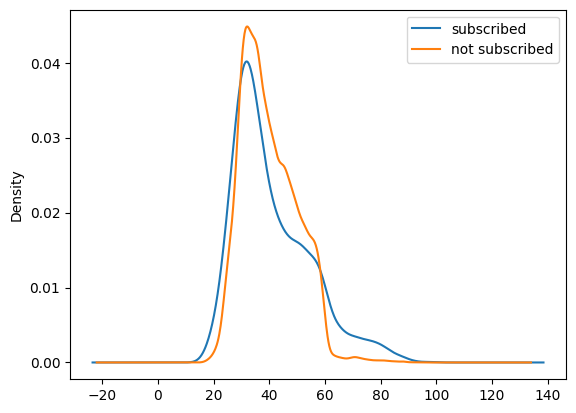

In [ ]:
df[df['y']=='yes'].age.plot(kind='kde', label='subscribed')
df[df['y']=='no'].age.plot(kind='kde', label='not subscribed')
plt.legend()

##Job and Subscribed

In [ ]:
df[]

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

##Duration and subscribed

In [ ]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<Axes: >

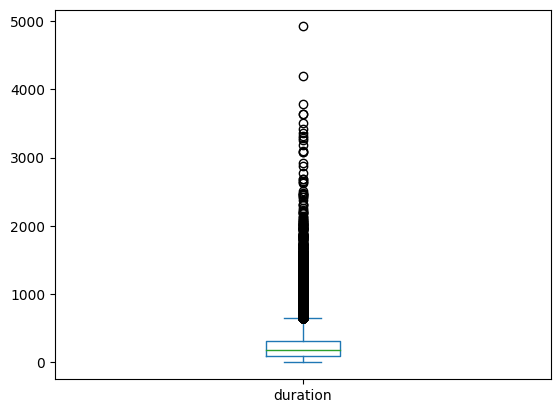

In [ ]:
df['duration'].plot(kind='box')

##

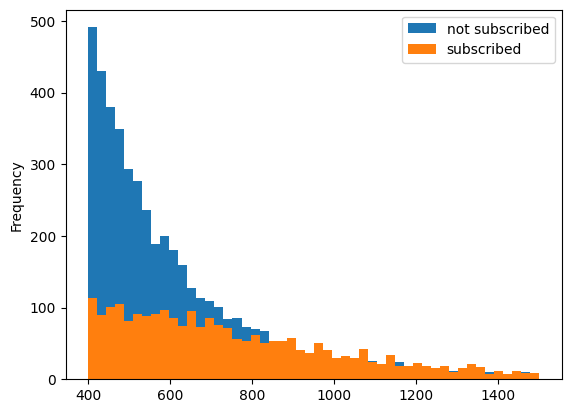

In [ ]:
df[df['subscribed']=='no'].duration.plot(kind='hist', label='not subscribed',bins=50, range=(400,1500))
df[df['subscribed']=='yes'].duration.plot(kind='hist', label='subscribed', bins=50,range=(400,1500))
plt.legend()

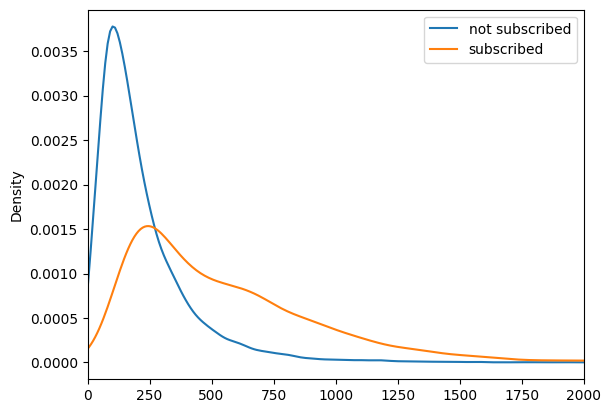

In [ ]:
df[df['subscribed']=='no'].duration.plot(kind='kde', label='not subscribed' )
df[df['subscribed']=='yes'].duration.plot(kind='kde', label='subscribed')
plt.xlim(0, 2000)
plt.legend()

#**Data Cleaning**

In [ ]:
df.drop(columns=['default'], inplace=True)

In [ ]:
df['job']=df['job'].replace('admin.','admin')
df['job']=df['job'].replace('blue-collar','blue collar')
df['job']=df['job'].replace('self-employed','self employed')

In [ ]:
df=df.replace('unknown','other')

In [ ]:
df['job'].value_counts()

job
admin            10422
blue collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self employed     1421
housemaid         1060
unemployed        1014
student            875
other              330
Name: count, dtype: int64

#**Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop(columns=['subscribed'])
y = df['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features=X.select_dtypes(include='object').columns
numerical_features=X.select_dtypes(include='number').columns

In [ ]:
categorical_features

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
numerical_features

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
categorical_transformer=Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])
numerical_transformer=Pipeline(steps=[
    ('scaling', StandardScaler())
])

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ('categorical', categorical_transformer, categorical_features),
    ('numerical', numerical_transformer, numerical_features)
])

#**Model Training**

In [ ]:
model= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
y_pred= model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 88.69%
